In [1]:
!pip install seaborn


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
# plt.rcParams['text.usetex'] = True

import seaborn as sns
sns.set_context("paper")

sns.set_style("whitegrid")

starting
starting
starting
starting


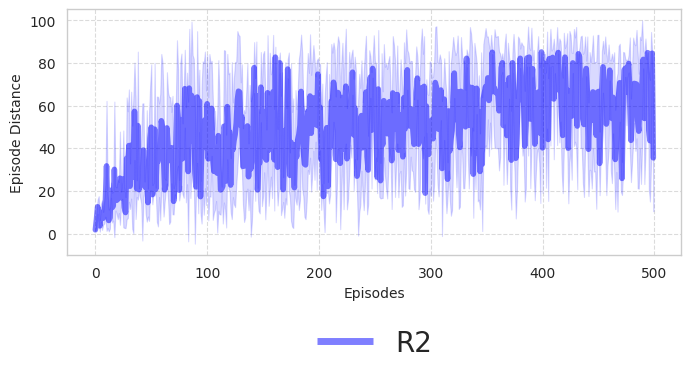

In [14]:
import re
import pandas as pd

returns = []

def get_returns(reward_type, log_num, env_type, log_file_path):
    # Path to your log file
    print("starting")
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    # print(log_file_path)

    # Initialize a list to store the extracted data
    returns_mean_data = []

    # Regular expression pattern to find the training/Returns Mean entry
    # Account for multiple spaces or tabs between the label and the value
    pattern = re.compile(r'training/env_infos/sum/distance Mean\s+([-]?\d*\.?\d*)')

    ct = 0
    # Read the log file
    try:
        with open(log_file_path, 'r') as file:
            for line in file:
                # print(line)
                match = pattern.search(line)
                if match:
                    ct += 1
                    # print(f"Match {ct}: {match.group(0)}")
                    returns_mean = float(match.group(1))
                    returns_mean_data.append(returns_mean)
                # Debug: Print lines that might be relevant but not matching
               
    except FileNotFoundError:
        print(f"Error: File {log_file_path} not found.")
        return None

    if not returns_mean_data:
        print("No matches found  in the log file.")
        return None

    # Create a DataFrame
    df = pd.DataFrame(returns_mean_data, columns=['training/env_infos/sum/distance Mean'])
    returns = df.values.reshape(1, -1)[0]
    # Normalize the returns
    # if len(returns) > 0:
    #     returns = (returns - min(returns)) / (max(returns) - min(returns)) if max(returns) != min(returns) else returns
    return returns

# Example usage (uncomment and adjust parameters as needed)
# returns = get_returns("rew2", "1", "track")
# print(returns)


def smoothen(arr, smoothing_window=100):
    smoothed_arr = (pd.Series(arr)
        .rolling(smoothing_window, min_periods=smoothing_window)
        .mean()
        )
    return smoothed_arr.values

def generate_plot(means, stds, save_path=""):
    qrsac_r1_mean = means
    qrsac_r1_std = stds
    
    qrsac_r1_xs = np.arange(len(qrsac_r1_mean))

    fig, ax = plt.subplots(figsize=(7, 4))
    # fig, ax = plt.subplots(figsize=(11, 8))

    plt.plot(qrsac_r1_xs, qrsac_r1_mean, c="b", label="R2", linewidth=4, alpha=0.5)
   

    plt.fill_between(qrsac_r1_xs,
                    qrsac_r1_mean - qrsac_r1_std,
                    qrsac_r1_mean + qrsac_r1_std,
                    color="b", alpha=0.15)
   
                                                                                                                            
    leg = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
               ncol=5, frameon=False, fancybox=False, shadow=False,
               fontsize=20)
    for line in leg.get_lines():
        line.set_linewidth(5.0)
        line.set_solid_capstyle('butt')
    # plt.ylim([80, 90])
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.xlabel("Episodes", fontsize=10)
    plt.ylabel("Episode Distance", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"{save_path}.png", dpi=200)
    plt.show()

returns_1 = []
for idx in range(1,5):
    reward_type = "rew3"
    # env_type = "track" 
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    returns_1.append(get_returns(reward_type, log_num, env_type, log_file_path)) #[:100])
returns_r1_mean = np.mean(returns_1, axis=0)
returns_r1_std = np.std(returns_1, axis=0)

WIN_SIZE=1
means_r1, stds_r1 = smoothen(returns_r1_mean, WIN_SIZE), smoothen(returns_r1_std, WIN_SIZE)
means, stds = (means_r1), (stds_r1)
generate_plot(means, stds, "result_plot")


Throttle

starting
starting
starting
starting


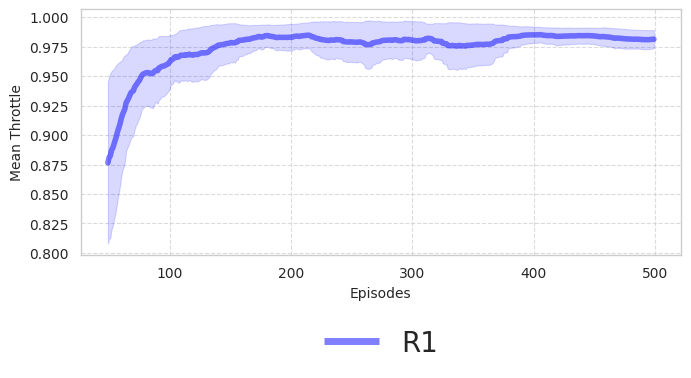

In [15]:
import re
import pandas as pd

returns = []

def get_returns(reward_type, log_num, env_type, log_file_path):
    # Path to your log file
    print("starting")
    # print(log_file_path)

    # Initialize a list to store the extracted data
    returns_mean_data = []

    # Regular expression pattern to find the training/Returns Mean entry
    # Account for multiple spaces or tabs between the label and the value
    pattern = re.compile(r'training/env_infos/average/action_throttle Mean\s+([-]?\d*\.?\d*)')

    ct = 0
    # Read the log file
    try:
        with open(log_file_path, 'r') as file:
            for line in file:
                # print(line)
                match = pattern.search(line)
                if match:
                    ct += 1
                    # print(f"Match {ct}: {match.group(0)}")
                    returns_mean = float(match.group(1))
                    returns_mean_data.append(returns_mean)
                # Debug: Print lines that might be relevant but not matching
               
    except FileNotFoundError:
        print(f"Error: File {log_file_path} not found.")
        return None

    if not returns_mean_data:
        print("No matches found  in the log file.")
        return None

    # Create a DataFrame
    df = pd.DataFrame(returns_mean_data, columns=['training/env_infos/average/action_throttle Mean'])
    returns = df.values.reshape(1, -1)[0]
    # Normalize the returns
    # if len(returns) > 0:
    #     returns = (returns - min(returns)) / (max(returns) - min(returns)) if max(returns) != min(returns) else returns
    return returns

# Example usage (uncomment and adjust parameters as needed)
# returns = get_returns("rew2", "1", "track")
# print(returns)


def smoothen(arr, smoothing_window=100):
    smoothed_arr = (pd.Series(arr)
        .rolling(smoothing_window, min_periods=smoothing_window)
        .mean()
        )
    return smoothed_arr.values

def generate_plot(means, stds, save_path=""):
    qrsac_r1_mean = means
    qrsac_r1_std = stds
    
    qrsac_r1_xs = np.arange(len(qrsac_r1_mean))

    fig, ax = plt.subplots(figsize=(7,4))
    # fig, ax = plt.subplots(figsize=(11, 8))

    plt.plot(qrsac_r1_xs, qrsac_r1_mean, c="b", label="R1", linewidth=4, alpha=0.5)
   

    plt.fill_between(qrsac_r1_xs,
                    qrsac_r1_mean - qrsac_r1_std,
                    qrsac_r1_mean + qrsac_r1_std,
                    color="b", alpha=0.15)
   
                                                                                                                            
    leg = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
               ncol=5, frameon=False, fancybox=False, shadow=False,
               fontsize=20)
    for line in leg.get_lines():
        line.set_linewidth(5.0)
        line.set_solid_capstyle('butt')
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.xlabel("Episodes", fontsize=10)
    plt.ylabel("Mean Throttle", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"{save_path}.png", dpi=200)
    plt.show()

returns_1 = []
for idx in range(1,5):
    reward_type = "rew3"
    # env_type = "track" 
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    returns_1.append(get_returns(reward_type, log_num, env_type, log_file_path)) #[:100])
returns_r1_mean = np.mean(returns_1, axis=0)
returns_r1_std = np.std(returns_1, axis=0)

WIN_SIZE=50
means_r1, stds_r1 = smoothen(returns_r1_mean, WIN_SIZE), smoothen(returns_r1_std, WIN_SIZE)
means, stds = (means_r1), (stds_r1)
generate_plot(means, stds, "result_plot")


starting
starting
starting
starting


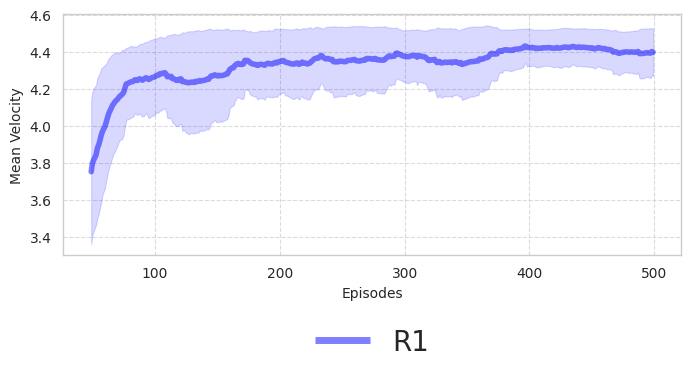

In [16]:
import re
import pandas as pd

returns = []

def get_returns(reward_type, log_num, env_type, log_file_path):
    # Path to your log file
    print("starting")
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    # print(log_file_path)

    # Initialize a list to store the extracted data
    returns_mean_data = []

    # Regular expression pattern to find the training/Returns Mean entry
    # Account for multiple spaces or tabs between the label and the value
    pattern = re.compile(r'training/env_infos/average/vel Mean\s+([-]?\d*\.?\d*)')

    ct = 0
    # Read the log file
    try:
        with open(log_file_path, 'r') as file:
            for line in file:
                # print(line)
                match = pattern.search(line)
                if match:
                    ct += 1
                    # print(f"Match {ct}: {match.group(0)}")
                    returns_mean = float(match.group(1))
                    returns_mean_data.append(returns_mean)
                # Debug: Print lines that might be relevant but not matching
               
    except FileNotFoundError:
        print(f"Error: File {log_file_path} not found.")
        return None

    if not returns_mean_data:
        print("No matches found  in the log file.")
        return None

    # Create a DataFrame
    df = pd.DataFrame(returns_mean_data, columns=['training/env_infos/average/vel Mean'])
    returns = df.values.reshape(1, -1)[0]
    # Normalize the returns
    # if len(returns) > 0:
    #     returns = (returns - min(returns)) / (max(returns) - min(returns)) if max(returns) != min(returns) else returns
    return returns

# Example usage (uncomment and adjust parameters as needed)
# returns = get_returns("rew2", "1", "track")
# print(returns)


def smoothen(arr, smoothing_window=100):
    smoothed_arr = (pd.Series(arr)
        .rolling(smoothing_window, min_periods=smoothing_window)
        .mean()
        )
    return smoothed_arr.values

def generate_plot(means, stds, save_path=""):
    qrsac_r1_mean = means
    qrsac_r1_std = stds
    
    qrsac_r1_xs = np.arange(len(qrsac_r1_mean))

    fig, ax = plt.subplots(figsize=(7,4))
    # fig, ax = plt.subplots(figsize=(11, 8))

    plt.plot(qrsac_r1_xs, qrsac_r1_mean, c="b", label="R1", linewidth=4, alpha=0.5)
   

    plt.fill_between(qrsac_r1_xs,
                    qrsac_r1_mean - qrsac_r1_std,
                    qrsac_r1_mean + qrsac_r1_std,
                    color="b", alpha=0.15)
   
                                                                                                                            
    leg = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
               ncol=5, frameon=False, fancybox=False, shadow=False,
               fontsize=20)
    for line in leg.get_lines():
        line.set_linewidth(5.0)
        line.set_solid_capstyle('butt')
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.xlabel("Episodes", fontsize=10)
    plt.ylabel("Mean Velocity", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"{save_path}.png", dpi=200)
    plt.show()

returns_1 = []
for idx in range(1,5):
    reward_type = "rew3"
    env_type = "track" #"road"
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    returns_1.append(get_returns(reward_type, log_num, env_type, log_file_path)) #[:100])
returns_r1_mean = np.mean(returns_1, axis=0)
returns_r1_std = np.std(returns_1, axis=0)

WIN_SIZE=50
means_r1, stds_r1 = smoothen(returns_r1_mean, WIN_SIZE), smoothen(returns_r1_std, WIN_SIZE)
means, stds = (means_r1), (stds_r1)
generate_plot(means, stds, "result_plot")


RETURN

starting
starting
starting
starting


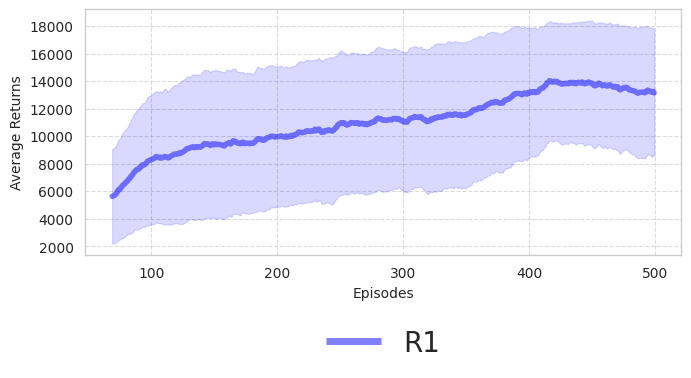

In [17]:
import re
import pandas as pd

returns = []

def get_returns(reward_type, log_num, env_type, log_file_path):
    # Path to your log file
    print("starting")
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    # print(log_file_path)

    # Initialize a list to store the extracted data
    returns_mean_data = []

    # Regular expression pattern to find the training/Returns Mean entry
    # Account for multiple spaces or tabs between the label and the value
    pattern = re.compile(r'training/Average Returns\s+([-]?\d*\.?\d*)')

    ct = 0
    # Read the log file
    try:
        with open(log_file_path, 'r') as file:
            for line in file:
                # print(line)
                match = pattern.search(line)
                if match:
                    ct += 1
                    # print(f"Match {ct}: {match.group(0)}")
                    returns_mean = float(match.group(1))
                    returns_mean_data.append(returns_mean)
                # Debug: Print lines that might be relevant but not matching
               
    except FileNotFoundError:
        print(f"Error: File {log_file_path} not found.")
        return None

    if not returns_mean_data:
        print("No matches found  in the log file.")
        return None

    # Create a DataFrame
    df = pd.DataFrame(returns_mean_data, columns=['training/Average Returns'])
    returns = df.values.reshape(1, -1)[0]
    # Normalize the returns
    # if len(returns) > 0:
    #     returns = (returns - min(returns)) / (max(returns) - min(returns)) if max(returns) != min(returns) else returns
    return returns

# Example usage (uncomment and adjust parameters as needed)
# returns = get_returns("rew2", "1", "track")
# print(returns)


def smoothen(arr, smoothing_window=100):
    smoothed_arr = (pd.Series(arr)
        .rolling(smoothing_window, min_periods=smoothing_window)
        .mean()
        )
    return smoothed_arr.values

def generate_plot(means, stds, save_path=""):
    qrsac_r1_mean = means
    qrsac_r1_std = stds
    
    qrsac_r1_xs = np.arange(len(qrsac_r1_mean))

    fig, ax = plt.subplots(figsize=(7,4))
    # fig, ax = plt.subplots(figsize=(11, 8))

    plt.plot(qrsac_r1_xs, qrsac_r1_mean, c="b", label="R1", linewidth=4, alpha=0.5)
   

    plt.fill_between(qrsac_r1_xs,
                    qrsac_r1_mean - qrsac_r1_std,
                    qrsac_r1_mean + qrsac_r1_std,
                    color="b", alpha=0.15)
   
                                                                                                                            
    leg = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
               ncol=5, frameon=False, fancybox=False, shadow=False,
               fontsize=20)
    for line in leg.get_lines():
        line.set_linewidth(5.0)
        line.set_solid_capstyle('butt')
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.xlabel("Episodes", fontsize=10)
    plt.ylabel("Average Returns", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"{save_path}.png", dpi=200)
    plt.show()

returns_1 = []
for idx in range(1,5):
    reward_type = "rew3"
    env_type = "track" #"road"
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    returns_1.append(get_returns(reward_type, log_num, env_type, log_file_path)) #[:100])
returns_r1_mean = np.mean(returns_1, axis=0)
returns_r1_std = np.std(returns_1, axis=0)

WIN_SIZE=70
means_r1, stds_r1 = smoothen(returns_r1_mean, WIN_SIZE), smoothen(returns_r1_std, WIN_SIZE)
means, stds = (means_r1), (stds_r1)
generate_plot(means, stds, "result_plot")


In [18]:
import re
import numpy as np

def get_returns(reward_type, log_num, env_type, log_file_path):
    print("Starting processing for", log_file_path)
    
    # Initialize a list to store the extracted distance data
    returns_mean_data = []
    
    # Regular expression pattern to find the training/env_infos/sum/distance Mean entry
    pattern = re.compile(r'training/env_infos/sum/distance Mean\s+([-]?\d*\.?\d*)')
    
    ct = 0
    # Read the log file
    try:
        with open(log_file_path, 'r') as file:
            for line in file:
                match = pattern.search(line)
                if match:
                    ct += 1
                    returns_mean = float(match.group(1))
                    returns_mean_data.append(returns_mean)
    except FileNotFoundError:
        print(f"Error: File {log_file_path} not found.")
        return None
    
    if not returns_mean_data:
        print(f"No matches found in the log file {log_file_path}.")
        return None
    
    return returns_mean_data

def count_epochs_by_range(returns_data):
    # Initialize a dictionary to hold counts for each range
    ranges = {
        "1-100": 0,
        "101-200": 0,
        "201-300": 0,
        "301-400": 0,
        "401-500": 0
    }
    
    # Count epochs with distance >= 80 in each range
    for epoch, distance in enumerate(returns_data):
        if distance >= 80:
            if 1 <= epoch + 1 <= 100:  # Adding 1 to epoch to match 1-based indexing if needed
                ranges["1-100"] += 1
            elif 101 <= epoch + 1 <= 200:
                ranges["101-200"] += 1
            elif 201 <= epoch + 1 <= 300:
                ranges["201-300"] += 1
            elif 301 <= epoch + 1 <= 400:
                ranges["301-400"] += 1
            elif 401 <= epoch + 1 <= 500:
                ranges["401-500"] += 1
    
    return ranges

# Process multiple log files and aggregate counts
aggregated_counts = {
    "1-100": 0,
    "101-200": 0,
    "201-300": 0,
    "301-400": 0,
    "401-500": 0
}

for idx in range(1, 5):
    reward_type = "rew3"
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    returns_data = get_returns(reward_type, log_num, env_type, log_file_path)
    if returns_data is not None:
        range_counts = count_epochs_by_range(returns_data)
        print(f"\nCounts for {log_file_path}:")
        for range_label, count in range_counts.items():
            print(f"{range_label}: {count}")
            aggregated_counts[range_label] += count

# Display aggregated counts across all log files
print("\nAggregated Counts Across All Log Files:")
for range_label, count in aggregated_counts.items():
    print(f"{range_label}: {count}")


Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_1.log

Counts for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_1.log:
1-100: 24
101-200: 19
201-300: 24
301-400: 41
401-500: 43
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_2.log

Counts for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_2.log:
1-100: 8
101-200: 21
201-300: 11
301-400: 43
401-500: 47
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_3.log

Counts for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_3.log:
1-100: 12
101-200: 24
201-300: 23
301-400: 38
401-500: 44
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_4.log

Counts for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_4.log:
1-100: 2
101-200: 16
20

LAPTIME

Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_1.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_2.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_3.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_4.log


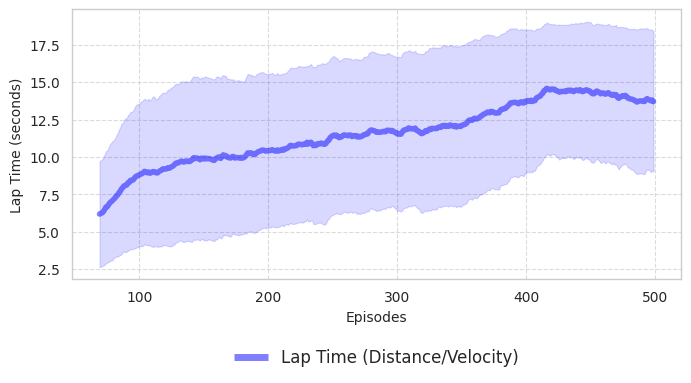

In [24]:
import re
import numpy as np
import matplotlib.pyplot as plt

def smoothen(arr, smoothing_window=100):
    smoothed_arr = (pd.Series(arr)
        .rolling(smoothing_window, min_periods=smoothing_window)
        .mean()
        )
    return smoothed_arr.values

def get_metrics(reward_type, log_num, env_type, log_file_path):
    print("Starting processing for", log_file_path)
    
    # Initialize lists to store the extracted data
    vel_mean_data = []
    distance_data = []
    
    # Regular expression patterns for Vel Mean and sum/distance Mean
    vel_pattern = re.compile(r'training/env_infos/average/vel Mean\s+([-]?\d*\.?\d*)')
    distance_pattern = re.compile(r'training/env_infos/sum/distance Mean\s+([-]?\d*\.?\d*)')
    
    vel_ct = 0
    dist_ct = 0
    # Read the log file
    try:
        with open(log_file_path, 'r') as file:
            for line in file:
                vel_match = vel_pattern.search(line)
                if vel_match:
                    vel_ct += 1
                    vel_mean = float(vel_match.group(1))
                    vel_mean_data.append(vel_mean)
                
                distance_match = distance_pattern.search(line)
                if distance_match:
                    dist_ct += 1
                    distance = float(distance_match.group(1))
                    distance_data.append(distance)
    except FileNotFoundError:
        print(f"Error: File {log_file_path} not found.")
        return None, None
    
    if not vel_mean_data or not distance_data:
        print(f"Warning: Missing data in {log_file_path}. Vel Mean matches: {vel_ct}, Distance Mean matches: {dist_ct}")
        return vel_mean_data if vel_mean_data else None, distance_data if distance_data else None
    
    return vel_mean_data, distance_data

def calculate_lap_time(vel_mean_data, distance_data):
    # Ensure the lists are of the same length (truncate to shortest)
    min_length = min(len(vel_mean_data), len(distance_data))
    vel_mean_data = vel_mean_data[:min_length]
    distance_data = distance_data[:min_length]
    
    # Initialize list to store lap times
    lap_times_velocity = []
    
    for vel, distance in zip(vel_mean_data, distance_data):
        # Calculate lap time using velocity (distance / velocity) if velocity > 0
        if vel > 0:
            lap_time_vel = distance / vel
        else:
            lap_time_vel = float('inf')  # Handle cases where velocity is 0 or negative
        lap_times_velocity.append(lap_time_vel)
    
    return lap_times_velocity

def generate_plot(means_vel, stds_vel, save_path=""):
    xs = np.arange(len(means_vel))
    
    fig, ax = plt.subplots(figsize=(7, 4))
    
    # Plot lap time using velocity method
    plt.plot(xs, means_vel, c="b", label="Lap Time (Distance/Velocity)", linewidth=4, alpha=0.5)
    plt.fill_between(xs,
                     means_vel - stds_vel,
                     means_vel + stds_vel,
                     color="b", alpha=0.15)
                                                                                                                            
    leg = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
                     ncol=1, frameon=False, fancybox=False, shadow=False,
                     fontsize=12)
    for line in leg.get_lines():
        line.set_linewidth(5.0)
        line.set_solid_capstyle('butt')
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.xlabel("Episodes", fontsize=10)
    plt.ylabel("Lap Time (seconds)", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"{save_path}_lap_time.png", dpi=200)
    plt.show()

# Process multiple log files
lap_times_vel_all = []

for idx in range(1, 5):
    reward_type = "rew3"
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    vel_mean_data, distance_data = get_metrics(reward_type, log_num, env_type, log_file_path)
    
    if vel_mean_data is not None and distance_data is not None:
        lap_times_velocity = calculate_lap_time(vel_mean_data, distance_data)
        lap_times_vel_all.append(lap_times_velocity)

# Calculate mean and standard deviation across runs
if lap_times_vel_all:
    # Ensure all arrays are of the same length (truncate to shortest length if necessary)
    min_length_vel = min(len(run) for run in lap_times_vel_all)
    lap_times_vel_all = [run[:min_length_vel] for run in lap_times_vel_all]
    
    # Convert to numpy array for calculation
    lap_times_vel_array = np.array(lap_times_vel_all)
    
    # Replace infinities with a large value for plotting purposes
    large_value = 1e6  # Arbitrary large value to represent invalid lap times
    lap_times_vel_array = np.where(lap_times_vel_array == float('inf'), large_value, lap_times_vel_array)
    
    # Calculate mean and std
    lap_times_vel_mean = np.mean(lap_times_vel_array, axis=0)
    lap_times_vel_std = np.std(lap_times_vel_array, axis=0)
    
    # Generate plot
    WIN_SIZE=70
    lap_times_vel_mean, lap_times_vel_std = smoothen(lap_times_vel_mean, WIN_SIZE), smoothen(lap_times_vel_std, WIN_SIZE)
    # means, stds = (means_r1), (stds_r1)
    generate_plot(lap_times_vel_mean, lap_times_vel_std, save_path="lap_time_plot")
else:
    print("No data to plot.")


Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew2_1.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew2_2.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew2_3.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew2_4.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew2_5.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_1.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_2.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_3.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_4.log


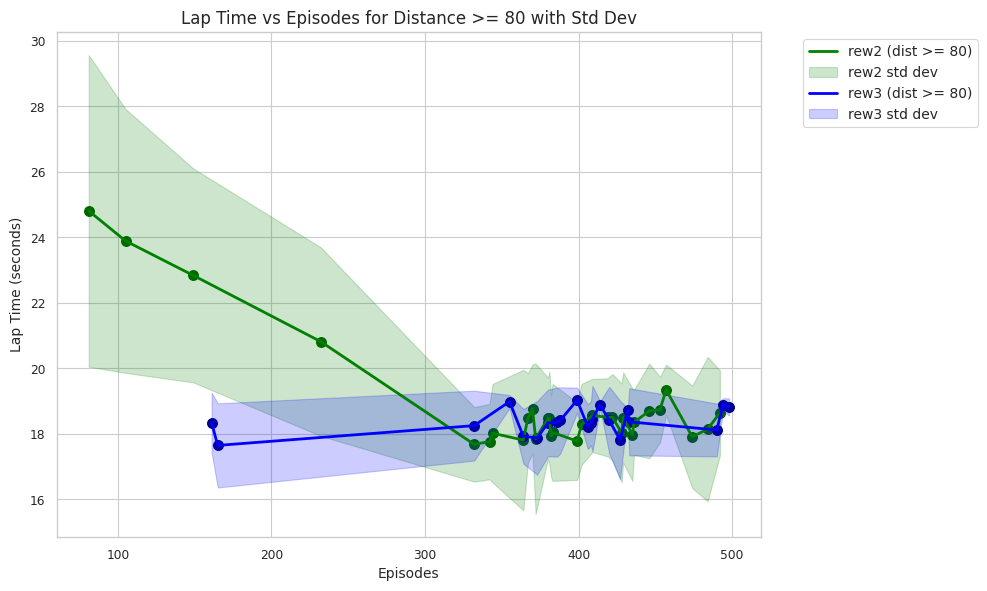

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def smoothen(arr, smoothing_window=70):
    smoothed_arr = (pd.Series(arr)
        .rolling(smoothing_window, min_periods=smoothing_window)
        .mean()
        )
    return smoothed_arr.values

def get_metrics(reward_type, log_num, env_type, log_file_path):
    print("Starting processing for", log_file_path)
    
    # Initialize lists to store the extracted data
    vel_mean_data = []
    distance_data = []
    
    # Regular expression patterns for Vel Mean and sum/distance Mean
    vel_pattern = re.compile(r'training/env_infos/average/vel Mean\s+([-]?\d*\.?\d*)')
    distance_pattern = re.compile(r'training/env_infos/sum/distance Mean\s+([-]?\d*\.?\d*)')
    
    vel_ct = 0
    dist_ct = 0
    # Read the log file
    try:
        with open(log_file_path, 'r') as file:
            for line in file:
                vel_match = vel_pattern.search(line)
                if vel_match:
                    vel_ct += 1
                    vel_mean = float(vel_match.group(1))
                    vel_mean_data.append(vel_mean)
                
                distance_match = distance_pattern.search(line)
                if distance_match:
                    dist_ct += 1
                    distance = float(distance_match.group(1))
                    distance_data.append(distance)
    except FileNotFoundError:
        print(f"Error: File {log_file_path} not found.")
        return None, None
    
    if not vel_mean_data or not distance_data:
        print(f"Warning: Missing data in {log_file_path}. Vel Mean matches: {vel_ct}, Distance Mean matches: {dist_ct}")
        return vel_mean_data if vel_mean_data else None, distance_data if distance_data else None
    
    return vel_mean_data, distance_data

def calculate_lap_time(vel_mean_data, distance_data):
    # Ensure the lists are of the same length (truncate to shortest)
    min_length = min(len(vel_mean_data), len(distance_data))
    vel_mean_data = vel_mean_data[:min_length]
    distance_data = distance_data[:min_length]
    
    # Initialize list to store lap times
    lap_times_velocity = []
    
    for vel, distance in zip(vel_mean_data, distance_data):
        # Calculate lap time using velocity (distance / velocity) if velocity > 0
        if vel > 0:
            lap_time_vel = distance / vel
        else:
            lap_time_vel = float('inf')  # Handle cases where velocity is 0 or negative
        lap_times_velocity.append(lap_time_vel)
    
    return lap_times_velocity

def generate_2d_plot(epochs_rew2, lap_times_rew2_mean, lap_times_rew2_std, distance_rew2, 
                     epochs_rew3, lap_times_rew3_mean, lap_times_rew3_std, distance_rew3, save_path=""):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Filter and plot for rew2 where distance >= 80
    mask_rew2_above_80 = distance_rew2 >= 80
    if np.any(mask_rew2_above_80):
        epochs_rew2_filtered = epochs_rew2[mask_rew2_above_80]
        lap_times_rew2_filtered = lap_times_rew2_mean[mask_rew2_above_80]
        lap_times_rew2_std_filtered = lap_times_rew2_std[mask_rew2_above_80]
        
        # Plot mean line
        ax.plot(epochs_rew2_filtered, lap_times_rew2_filtered, c='green', label='rew2 (dist >= 80)', linewidth=2)
        # Plot scatter points for mean
        ax.scatter(epochs_rew2_filtered, lap_times_rew2_filtered, c='darkgreen', marker='o', s=50)
        # Plot standard deviation as translucent shading
        ax.fill_between(epochs_rew2_filtered, 
                        lap_times_rew2_filtered - lap_times_rew2_std_filtered, 
                        lap_times_rew2_filtered + lap_times_rew2_std_filtered, 
                        color='green', alpha=0.2, label='rew2 std dev')
    
    # Uncomment this block to include rew3 plotting with std dev
    
    # Filter and plot for rew3 where distance >= 80
    mask_rew3_above_80 = distance_rew3 >= 80
    if np.any(mask_rew3_above_80):
        epochs_rew3_filtered = epochs_rew3[mask_rew3_above_80]
        lap_times_rew3_filtered = lap_times_rew3_mean[mask_rew3_above_80]
        lap_times_rew3_std_filtered = lap_times_rew3_std[mask_rew3_above_80]
        
        # Plot mean line
        ax.plot(epochs_rew3_filtered, lap_times_rew3_filtered, c='blue', label='rew3 (dist >= 80)', linewidth=2)
        # Plot scatter points for mean
        ax.scatter(epochs_rew3_filtered, lap_times_rew3_filtered, c='darkblue', marker='o', s=50)
        # Plot standard deviation as translucent shading
        ax.fill_between(epochs_rew3_filtered, 
                        lap_times_rew3_filtered - lap_times_rew3_std_filtered, 
                        lap_times_rew3_filtered + lap_times_rew3_std_filtered, 
                        color='blue', alpha=0.2, label='rew3 std dev')
    
    
    # Set labels
    ax.set_xlabel('Episodes', fontsize=10)
    ax.set_ylabel('Lap Time (seconds)', fontsize=10)
    ax.set_title('Lap Time vs Episodes for Distance >= 80 with Std Dev', fontsize=12)
    
    # Add legend
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    
    # Adjust layout
    plt.tight_layout()
    plt.savefig(f"{save_path}_2d_lap_time_distance.png", dpi=200)
    plt.show()

# Process multiple log files for rew2 and rew3
lap_times_vel_rew2_all = []
lap_times_vel_rew3_all = []
distance_rew2_all = []
distance_rew3_all = []

# Process rew2 logs
for idx in range(1, 6):
    reward_type = "rew2"
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    vel_mean_data, distance_data = get_metrics(reward_type, log_num, env_type, log_file_path)
    
    if vel_mean_data is not None and distance_data is not None:
        lap_times_velocity = calculate_lap_time(vel_mean_data, distance_data)
        lap_times_vel_rew2_all.append(lap_times_velocity)
        distance_rew2_all.append(distance_data)

# Process rew3 logs
for idx in range(1, 5):
    reward_type = "rew3"
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    vel_mean_data, distance_data = get_metrics(reward_type, log_num, env_type, log_file_path)
    
    if vel_mean_data is not None and distance_data is not None:
        lap_times_velocity = calculate_lap_time(vel_mean_data, distance_data)
        lap_times_vel_rew3_all.append(lap_times_velocity)
        distance_rew3_all.append(distance_data)

# Calculate mean and std across runs for both rew2 and rew3
if lap_times_vel_rew2_all and lap_times_vel_rew3_all:
    # Ensure all arrays are of the same length (truncate to shortest length if necessary)
    min_length_rew2 = min(len(run) for run in lap_times_vel_rew2_all)
    min_length_rew3 = min(len(run) for run in lap_times_vel_rew3_all)
    min_length_dist_rew2 = min(len(run) for run in distance_rew2_all)
    min_length_dist_rew3 = min(len(run) for run in distance_rew3_all)
    
    lap_times_vel_rew2_all = [run[:min_length_rew2] for run in lap_times_vel_rew2_all]
    lap_times_vel_rew3_all = [run[:min_length_rew3] for run in lap_times_vel_rew3_all]
    distance_rew2_all = [run[:min_length_dist_rew2] for run in distance_rew2_all]
    distance_rew3_all = [run[:min_length_dist_rew3] for run in distance_rew3_all]
    
    # Convert to numpy arrays for calculation
    lap_times_vel_rew2_array = np.array(lap_times_vel_rew2_all)
    lap_times_vel_rew3_array = np.array(lap_times_vel_rew3_all)
    distance_rew2_array = np.array(distance_rew2_all)
    distance_rew3_array = np.array(distance_rew3_all)
    
    # Replace infinities with a large value for plotting purposes
    large_value = 1e6  # Arbitrary large value to represent invalid lap times
    lap_times_vel_rew2_array = np.where(lap_times_vel_rew2_array == float('inf'), large_value, lap_times_vel_rew2_array)
    lap_times_vel_rew3_array = np.where(lap_times_vel_rew3_array == float('inf'), large_value, lap_times_vel_rew3_array)
    
    # Calculate mean and std for rew2
    lap_times_vel_rew2_mean = np.mean(lap_times_vel_rew2_array, axis=0)
    lap_times_vel_rew2_std = np.std(lap_times_vel_rew2_array, axis=0)
    distance_rew2_mean = np.mean(distance_rew2_array, axis=0)
    
    # Calculate mean and std for rew3
    lap_times_vel_rew3_mean = np.mean(lap_times_vel_rew3_array, axis=0)
    lap_times_vel_rew3_std = np.std(lap_times_vel_rew3_array, axis=0)
    distance_rew3_mean = np.mean(distance_rew3_array, axis=0)
    
    # Apply smoothing with window size 70 for better visualization
    WIN_SIZE = 1
    lap_times_vel_rew2_mean = smoothen(lap_times_vel_rew2_mean, WIN_SIZE)
    lap_times_vel_rew2_std = smoothen(lap_times_vel_rew2_std, WIN_SIZE)
    distance_rew2_mean = smoothen(distance_rew2_mean, WIN_SIZE)
    lap_times_vel_rew3_mean = smoothen(lap_times_vel_rew3_mean, WIN_SIZE)
    lap_times_vel_rew3_std = smoothen(lap_times_vel_rew3_std, WIN_SIZE)
    distance_rew3_mean = smoothen(distance_rew3_mean, WIN_SIZE)
    
    # Generate epochs (x-axis)
    epochs_rew2 = np.arange(len(lap_times_vel_rew2_mean))
    epochs_rew3 = np.arange(len(lap_times_vel_rew3_mean))
    
    # Generate 2D plot with std dev
    generate_2d_plot(epochs_rew2, lap_times_vel_rew2_mean, lap_times_vel_rew2_std, distance_rew2_mean, 
                     epochs_rew3, lap_times_vel_rew3_mean, lap_times_vel_rew3_std, distance_rew3_mean, 
                     save_path="lap_time_plot")
else:
    print("No data to plot for one or both reward types.")


In [27]:
import re
import numpy as np

def get_returns(reward_type, log_num, env_type, log_file_path):
    print("Starting processing for", log_file_path)
    
    # Initialize a list to store the extracted distance data
    returns_mean_data = []
    
    # Regular expression pattern to find the training/env_infos/sum/distance Mean entry
    pattern = re.compile(r'training/env_infos/sum/distance Mean\s+([-]?\d*\.?\d*)')
    
    ct = 0
    # Read the log file
    try:
        with open(log_file_path, 'r') as file:
            for line in file:
                match = pattern.search(line)
                if match:
                    ct += 1
                    returns_mean = float(match.group(1))
                    returns_mean_data.append(returns_mean)
    except FileNotFoundError:
        print(f"Error: File {log_file_path} not found.")
        return None
    
    if not returns_mean_data:
        print(f"No matches found in the log file {log_file_path}.")
        return None
    
    return returns_mean_data

def count_epochs_by_range(returns_data):
    # Initialize a dictionary to hold counts for each range
    ranges = {
        "1-100": 0,
        "101-200": 0,
        "201-300": 0,
        "301-400": 0,
        "401-500": 0
    }
    
    # Count epochs with distance >= 80 in each range
    for epoch, distance in enumerate(returns_data):
        if distance >= 80:
            if 1 <= epoch + 1 <= 100:  # Adding 1 to epoch to match 1-based indexing if needed
                ranges["1-100"] += 1
            elif 101 <= epoch + 1 <= 200:
                ranges["101-200"] += 1
            elif 201 <= epoch + 1 <= 300:
                ranges["201-300"] += 1
            elif 301 <= epoch + 1 <= 400:
                ranges["301-400"] += 1
            elif 401 <= epoch + 1 <= 500:
                ranges["401-500"] += 1
    
    return ranges

# Process multiple log files and aggregate counts
aggregated_counts = {
    "1-100": 0,
    "101-200": 0,
    "201-300": 0,
    "301-400": 0,
    "401-500": 0
}

for idx in range(1, 6):
    reward_type = "rew3"
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    returns_data = get_returns(reward_type, log_num, env_type, log_file_path)
    if returns_data is not None:
        range_counts = count_epochs_by_range(returns_data)
        print(f"\nCounts for {log_file_path}:")
        for range_label, count in range_counts.items():
            print(f"{range_label}: {count}")
            aggregated_counts[range_label] += count

# Display aggregated counts across all log files
print("\nAggregated Counts Across All Log Files:")
for range_label, count in aggregated_counts.items():
    print(f"{range_label}: {count}")


Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_1.log

Counts for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_1.log:
1-100: 24
101-200: 19
201-300: 24
301-400: 41
401-500: 43
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_2.log

Counts for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_2.log:
1-100: 8
101-200: 21
201-300: 11
301-400: 43
401-500: 47
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_3.log

Counts for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_3.log:
1-100: 12
101-200: 24
201-300: 23
301-400: 38
401-500: 44
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_4.log

Counts for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_4.log:
1-100: 2
101-200: 16
20